In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from pathlib import Path
from keras.utils import np_utils
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator

In [ ]:
Food = ['Albert-Enstein','Bao-Lan','Faraday']
dir_train = '/content/drive/MyDrive/Face-recognition' 
distpath = []
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
def create_data(dir, x_train, y_train):
  for i in Food:
    path = os.path.join(dir,i)
    index_label = Food.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      X_train.append(img)
      y_train.append(index_label)
create_data(dir_train, X_train, y_train) 

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(X_train.shape) 
print(y_train.shape)

(30, 150, 150, 3)
(30, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(27,48),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3),strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(10, activation='softmax', name='layer4'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 128)         10616960  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 1, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs = 100, verbose=1,batch_size=40)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.3034 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 1.9426 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 1.5934 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 1.8305 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.4965 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.6126 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 1.3963 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 1.1343 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 1.1782 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 1.0794 - accuracy: 0.3333
Epoch 11/100
1/1 [=================

In [ ]:
model.save('Face-recognition.h5')

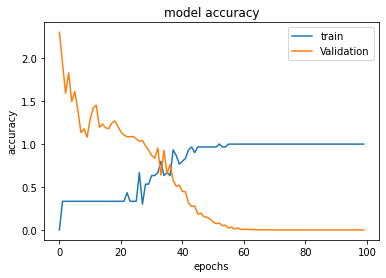

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

Albert_Enstein


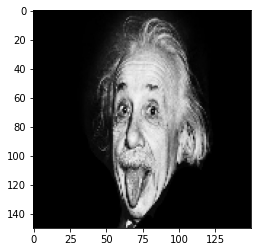

In [ ]:
filename = '/content/drive/MyDrive/Face-recognition/Albert-EnsteinTest.jpg'  
face = image.load_img(filename, target_size=(150,150))
plt.imshow(face)
face = img_to_array(face)
face = face.reshape(1,150,150,3) 
face = face.astype('float32')
face = face/255
np.argmax(model.predict(face), axis=1)

if np.argmax(model.predict(face)) == 0:
   print("Albert_Enstein")
if np.argmax(model.predict(face)) == 1:
   print("Bảo_Lân")
if np.argmax(model.predict(face)) == 2:
   print("Michael_Faraday")